In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('Fitness Club Data V4.xlsx')

df = df[df['age'] >= 16]

In [ ]:
import pandas as pd

filtered_price = df['price'].dropna()
filtered_price = filtered_price[filtered_price > 0]

lower_bound = filtered_price.quantile(0.05)
upper_bound = filtered_price.quantile(0.95)

filtered_price = filtered_price[(filtered_price >= lower_bound) & (filtered_price <= upper_bound)]

mean_price = filtered_price.mean()
print("Mean membership price (5th to 95th percentile, non-zero):", mean_price)

Mean membership price (5th to 95th percentile, non-zero): 822.0816277237499


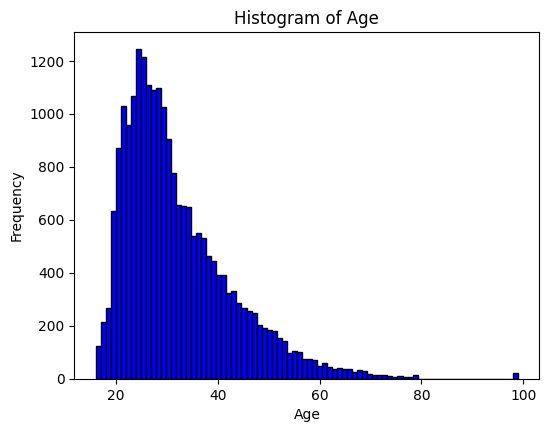

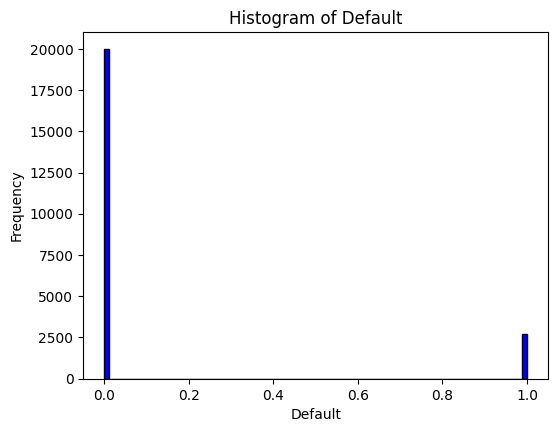

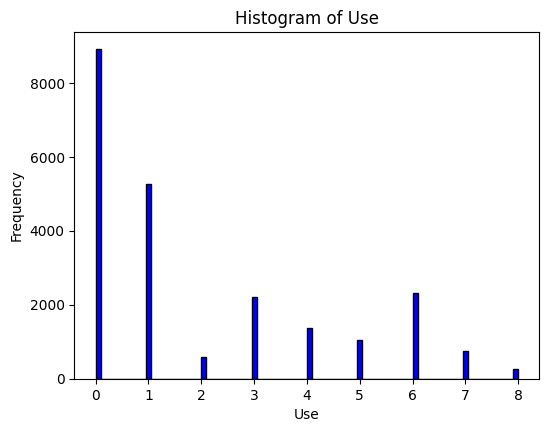

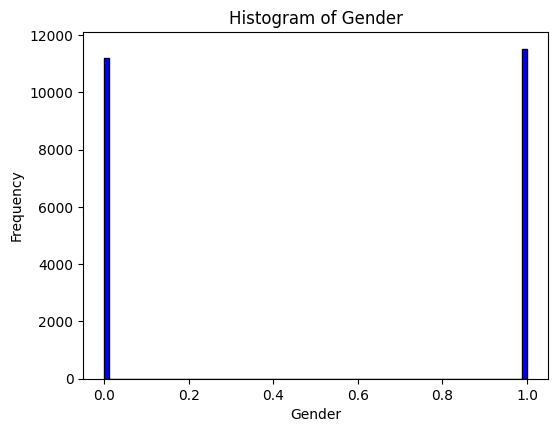

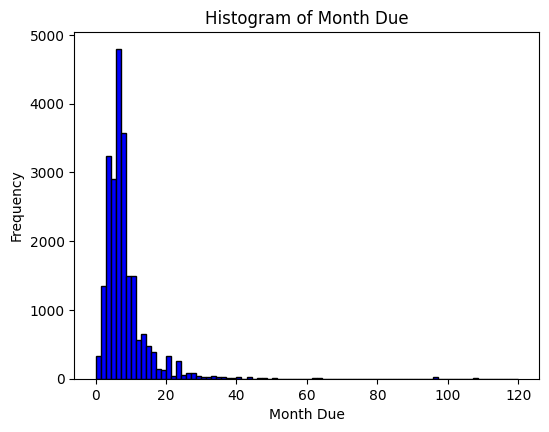

In [ ]:
plt.figure(figsize=(6, 4.5))
plt.hist(df['age'], bins=84, color='blue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

plt.figure(figsize=(6, 4.5))
plt.hist(df['default'], bins=84, color='blue', edgecolor='black')
plt.title('Histogram of Default')
plt.xlabel('Default')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

plt.figure(figsize=(6, 4.5))
plt.hist(df['use'], bins=84, color='blue', edgecolor='black')
plt.title('Histogram of Use')
plt.xlabel('Use')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

plt.figure(figsize=(6, 4.5))
plt.hist(df['gender'], bins=84, color='blue', edgecolor='black')
plt.title('Histogram of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

plt.figure(figsize=(6, 4.5))
plt.hist(df['monthdue'], bins=84, color='blue', edgecolor='black')
plt.title('Histogram of Month Due')
plt.xlabel('Month Due')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


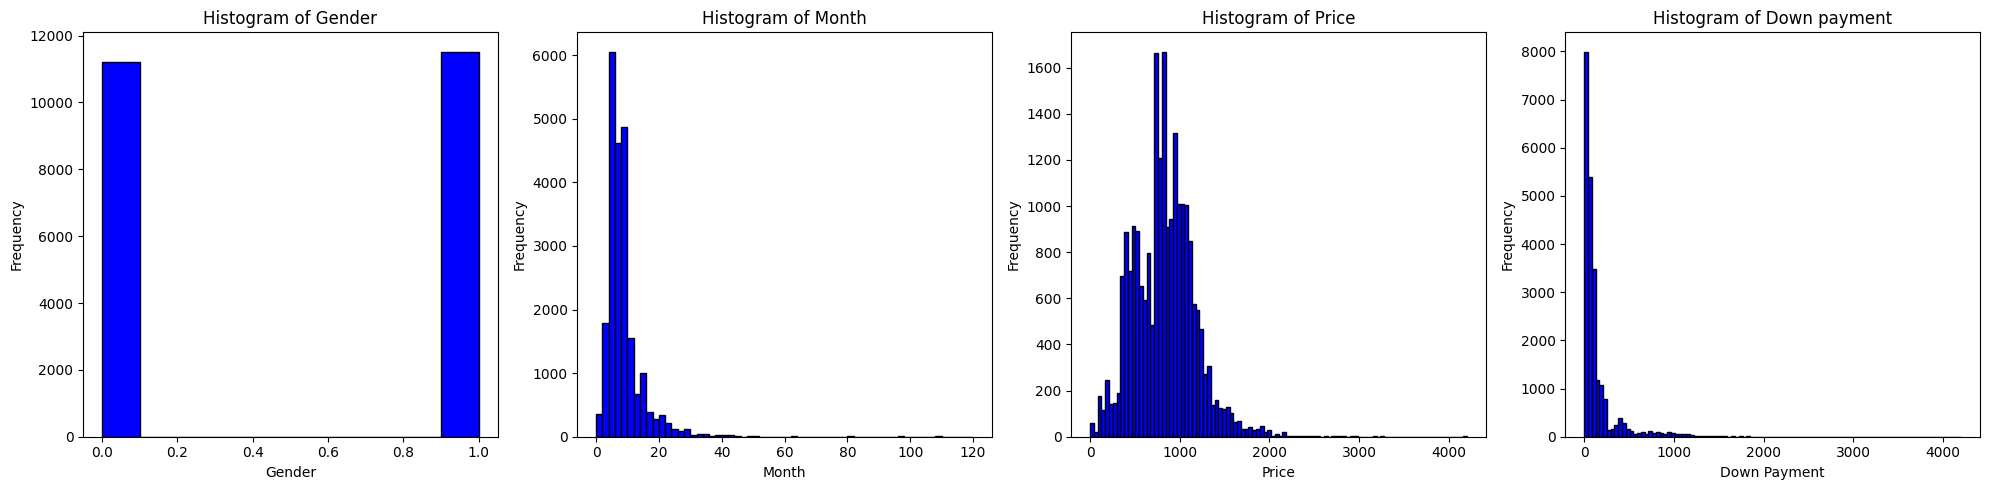

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].hist(df['gender'], bins=10, color='blue', edgecolor='black')
axs[0].set_title('Histogram of Gender')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['monthdue'], bins=60, color='blue', edgecolor='black')
axs[1].set_title('Histogram of Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Frequency')

axs[2].hist(df['price'], bins=100, color='blue', edgecolor='black')
axs[2].set_title('Histogram of Price')
axs[2].set_xlabel('Price')
axs[2].set_ylabel('Frequency')

axs[3].hist(df['downpmt'], bins=100, color='blue', edgecolor='black')
axs[3].set_title('Histogram of Down payment')
axs[3].set_xlabel('Down Payment')
axs[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

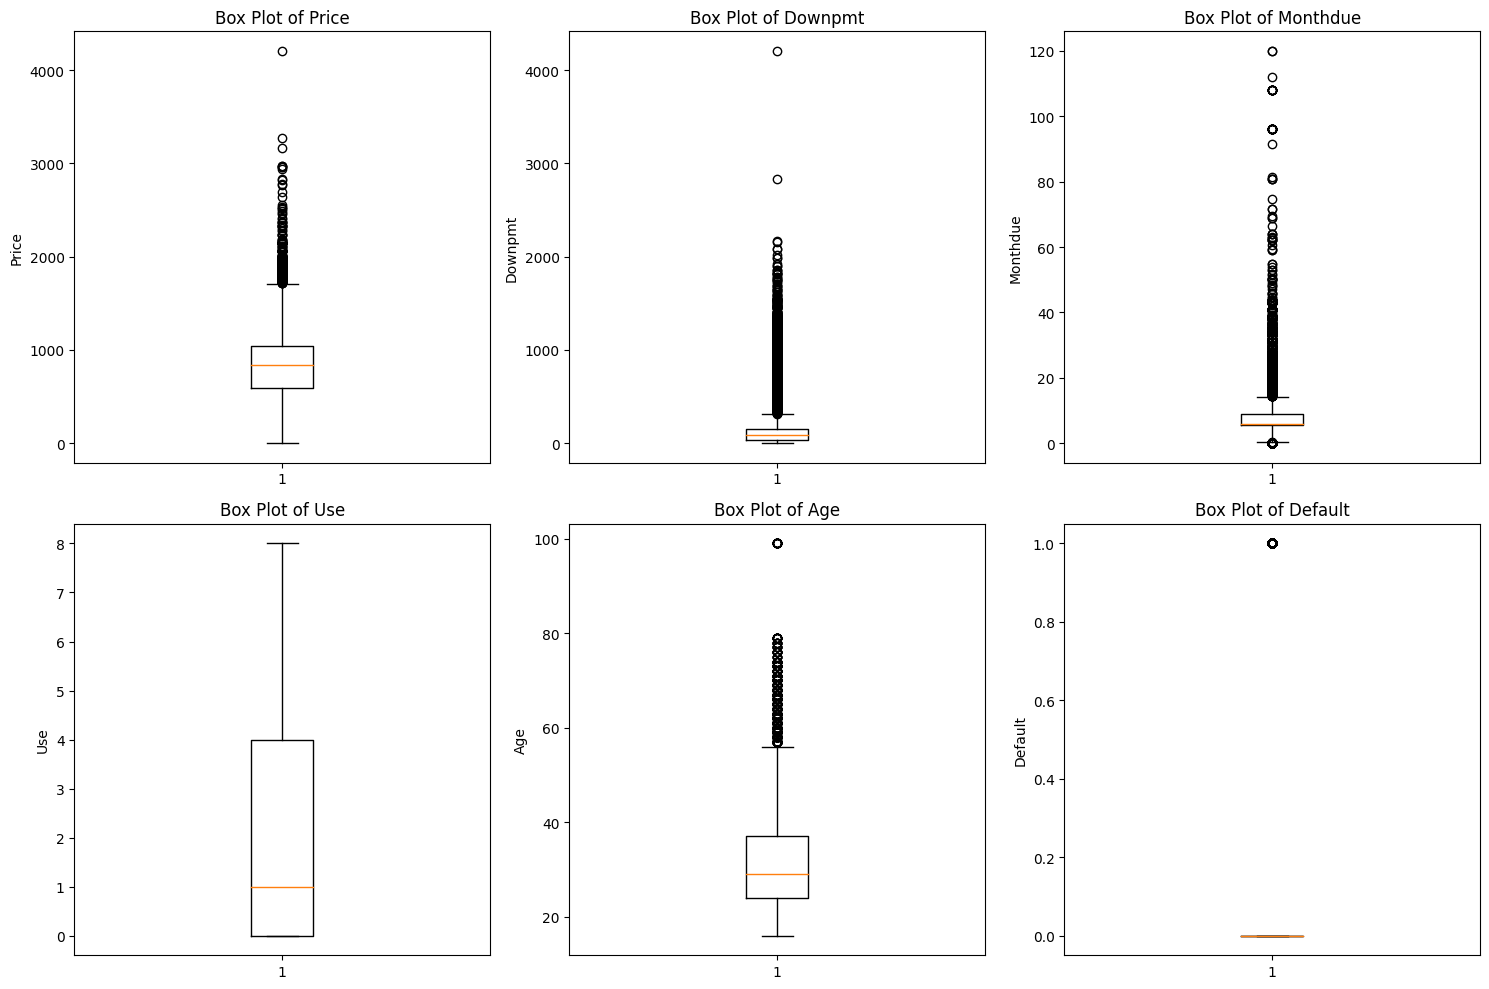

In [ ]:
numerical_columns = ['price', 'downpmt', 'monthdue', 'use', 'age', 'default']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    row = i // 3
    col_idx = i % 3
    axs[row, col_idx].boxplot(df[col])
    axs[row, col_idx].set_title(f'Box Plot of {col.capitalize()}')
    axs[row, col_idx].set_ylabel(col.capitalize())

plt.tight_layout()
plt.show()

<ipython-input-11-8c580a727436>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_default_counts = df.groupby(['age_group', 'default']).size().unstack()


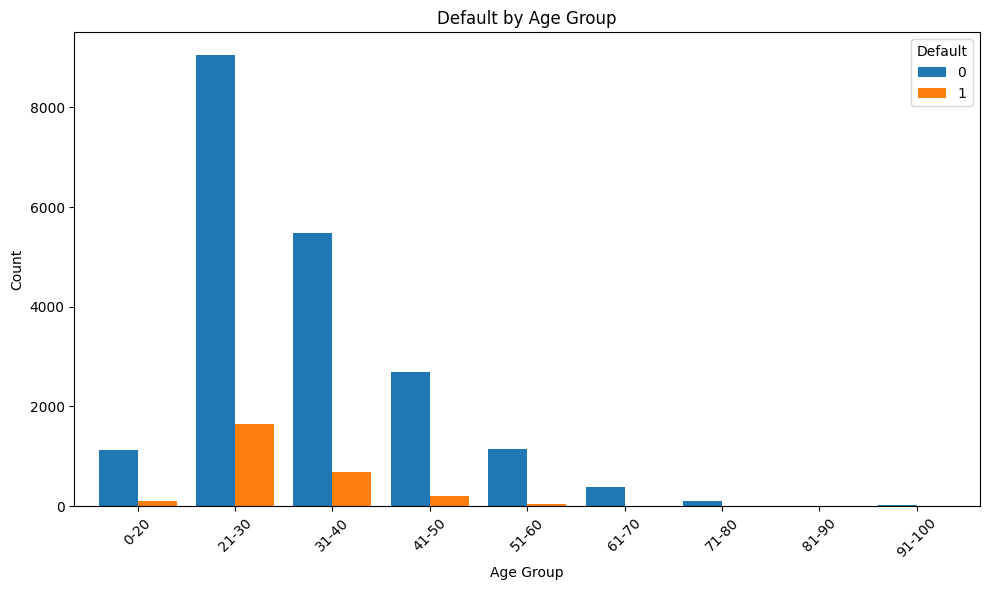

In [ ]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

age_default_counts = df.groupby(['age_group', 'default']).size().unstack()

age_default_counts.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Default by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.tight_layout()

plt.show()

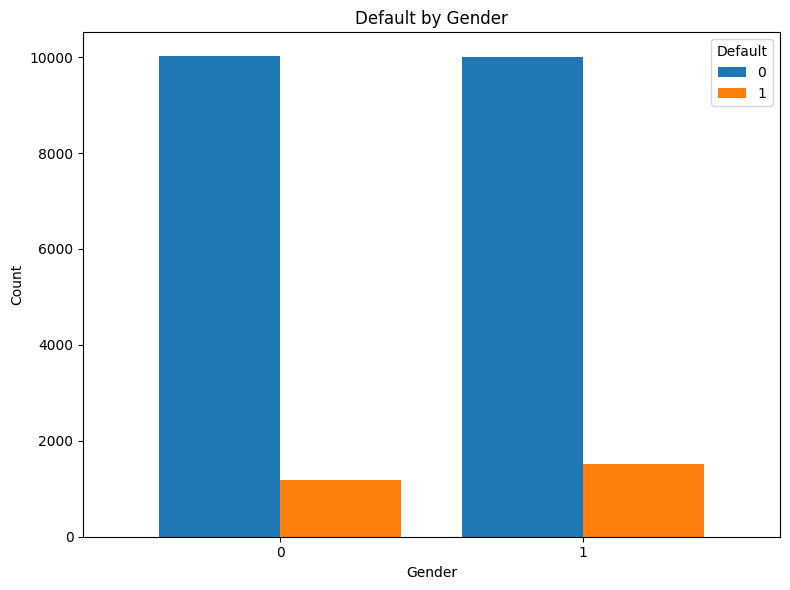

In [ ]:
gender_default_counts = df.groupby(['gender', 'default']).size().unstack()

gender_default_counts.plot(kind='bar', figsize=(8, 6), width=0.8)

plt.title('Default by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Default', loc='upper right')
plt.tight_layout()

plt.show()

<ipython-input-14-8c657e0ad98d>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_default_counts = df.groupby(['price_group', 'default']).size().unstack()


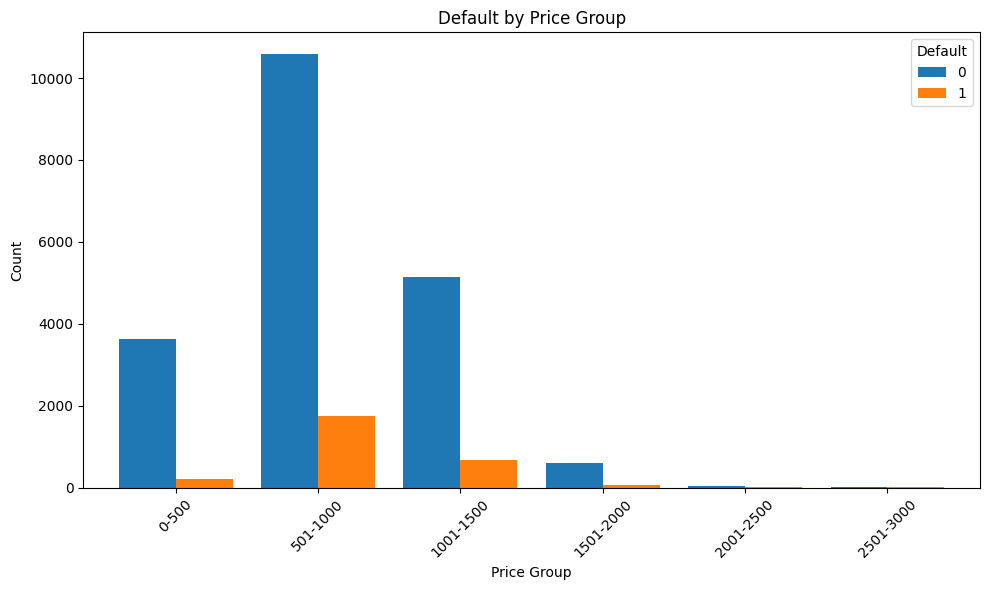

In [ ]:
price_bins = [0, 500, 1000, 1500, 2000, 2500, 3000]
price_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000']

df['price_group'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=False)

price_default_counts = df.groupby(['price_group', 'default']).size().unstack()

price_default_counts.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Default by Price Group')
plt.xlabel('Price Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.tight_layout()

plt.show()

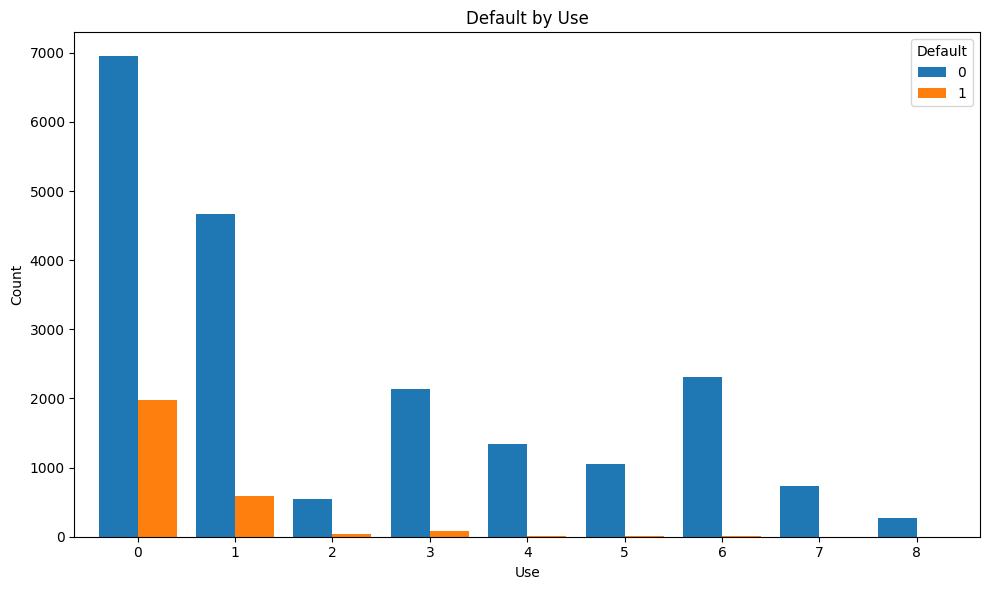

In [ ]:
use_default_counts = df.groupby(['use', 'default']).size().unstack()

use_default_counts.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Default by Use')
plt.xlabel('Use')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Default', loc='upper right')
plt.tight_layout()

plt.show()

<ipython-input-16-b71599951805>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  downpmt_default_counts = df.groupby(['downpmt_group', 'default']).size().unstack()


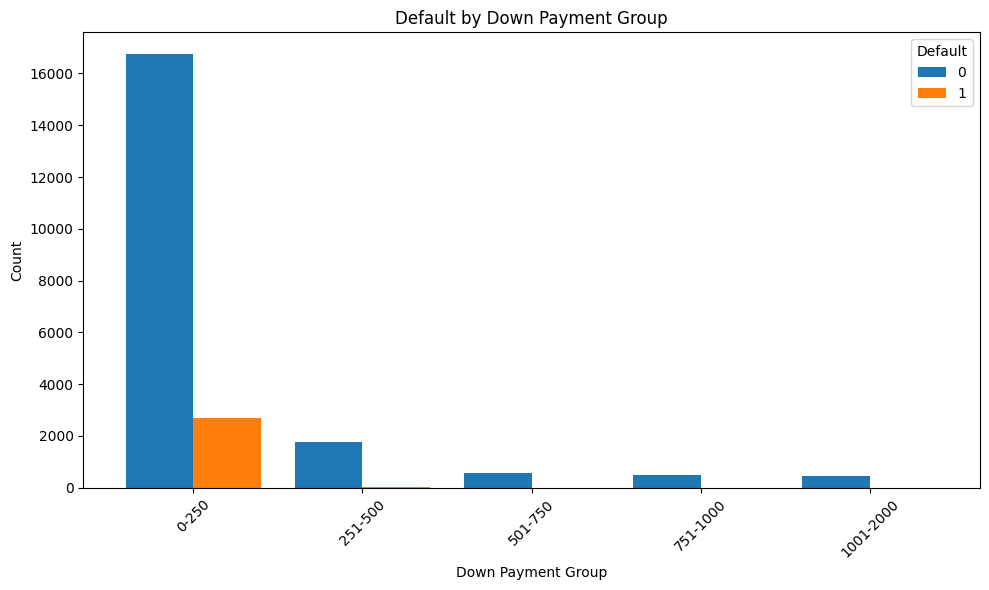

In [ ]:
downpmt_bins = [0, 250, 500, 750, 1000, 2000]
downpmt_labels = ['0-250', '251-500', '501-750', '751-1000', '1001-2000']

df['downpmt_group'] = pd.cut(df['downpmt'], bins=downpmt_bins, labels=downpmt_labels, right=False)

downpmt_default_counts = df.groupby(['downpmt_group', 'default']).size().unstack()

downpmt_default_counts.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Default by Down Payment Group')
plt.xlabel('Down Payment Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.tight_layout()

plt.show()

<ipython-input-17-6c60de6c9674>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthdue_default_counts = df.groupby(['monthdue_group', 'default']).size().unstack()


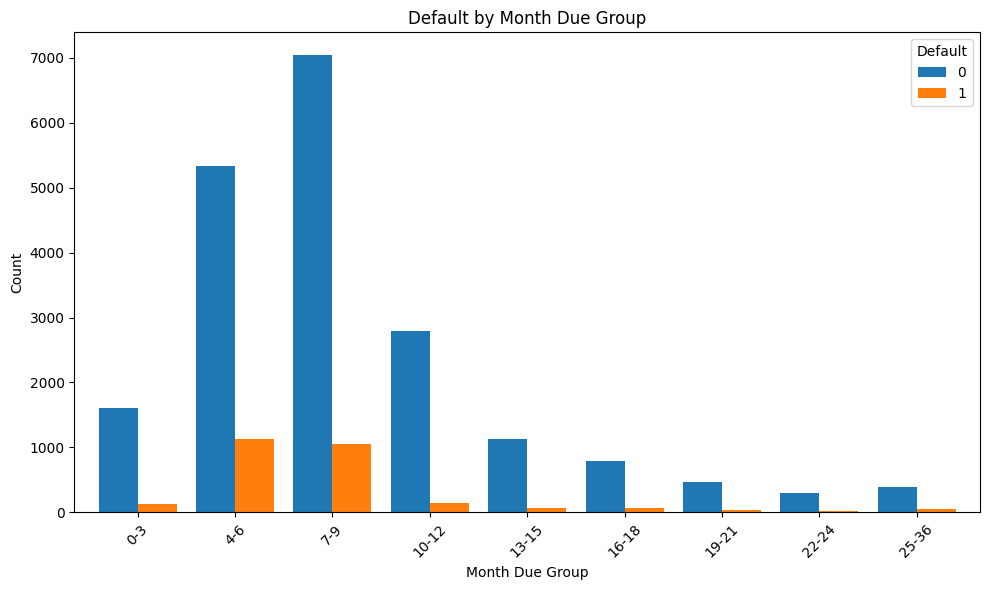

In [ ]:
monthdue_bins = [0, 3, 6, 9, 12, 15, 18, 21, 24, 36]
monthdue_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-21', '22-24', '25-36']

df['monthdue_group'] = pd.cut(df['monthdue'], bins=monthdue_bins, labels=monthdue_labels, right=False)

monthdue_default_counts = df.groupby(['monthdue_group', 'default']).size().unstack()

monthdue_default_counts.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Default by Month Due Group')
plt.xlabel('Month Due Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.tight_layout()

plt.show()

<ipython-input-10-3872dbea410a>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_default_counts = df.groupby(['price_group', 'default']).size().unstack()
<ipython-input-10-3872dbea410a>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  downpmt_default_counts = df.groupby(['downpmt_group', 'default']).size().unstack()
<ipython-input-10-3872dbea410a>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthdue_default

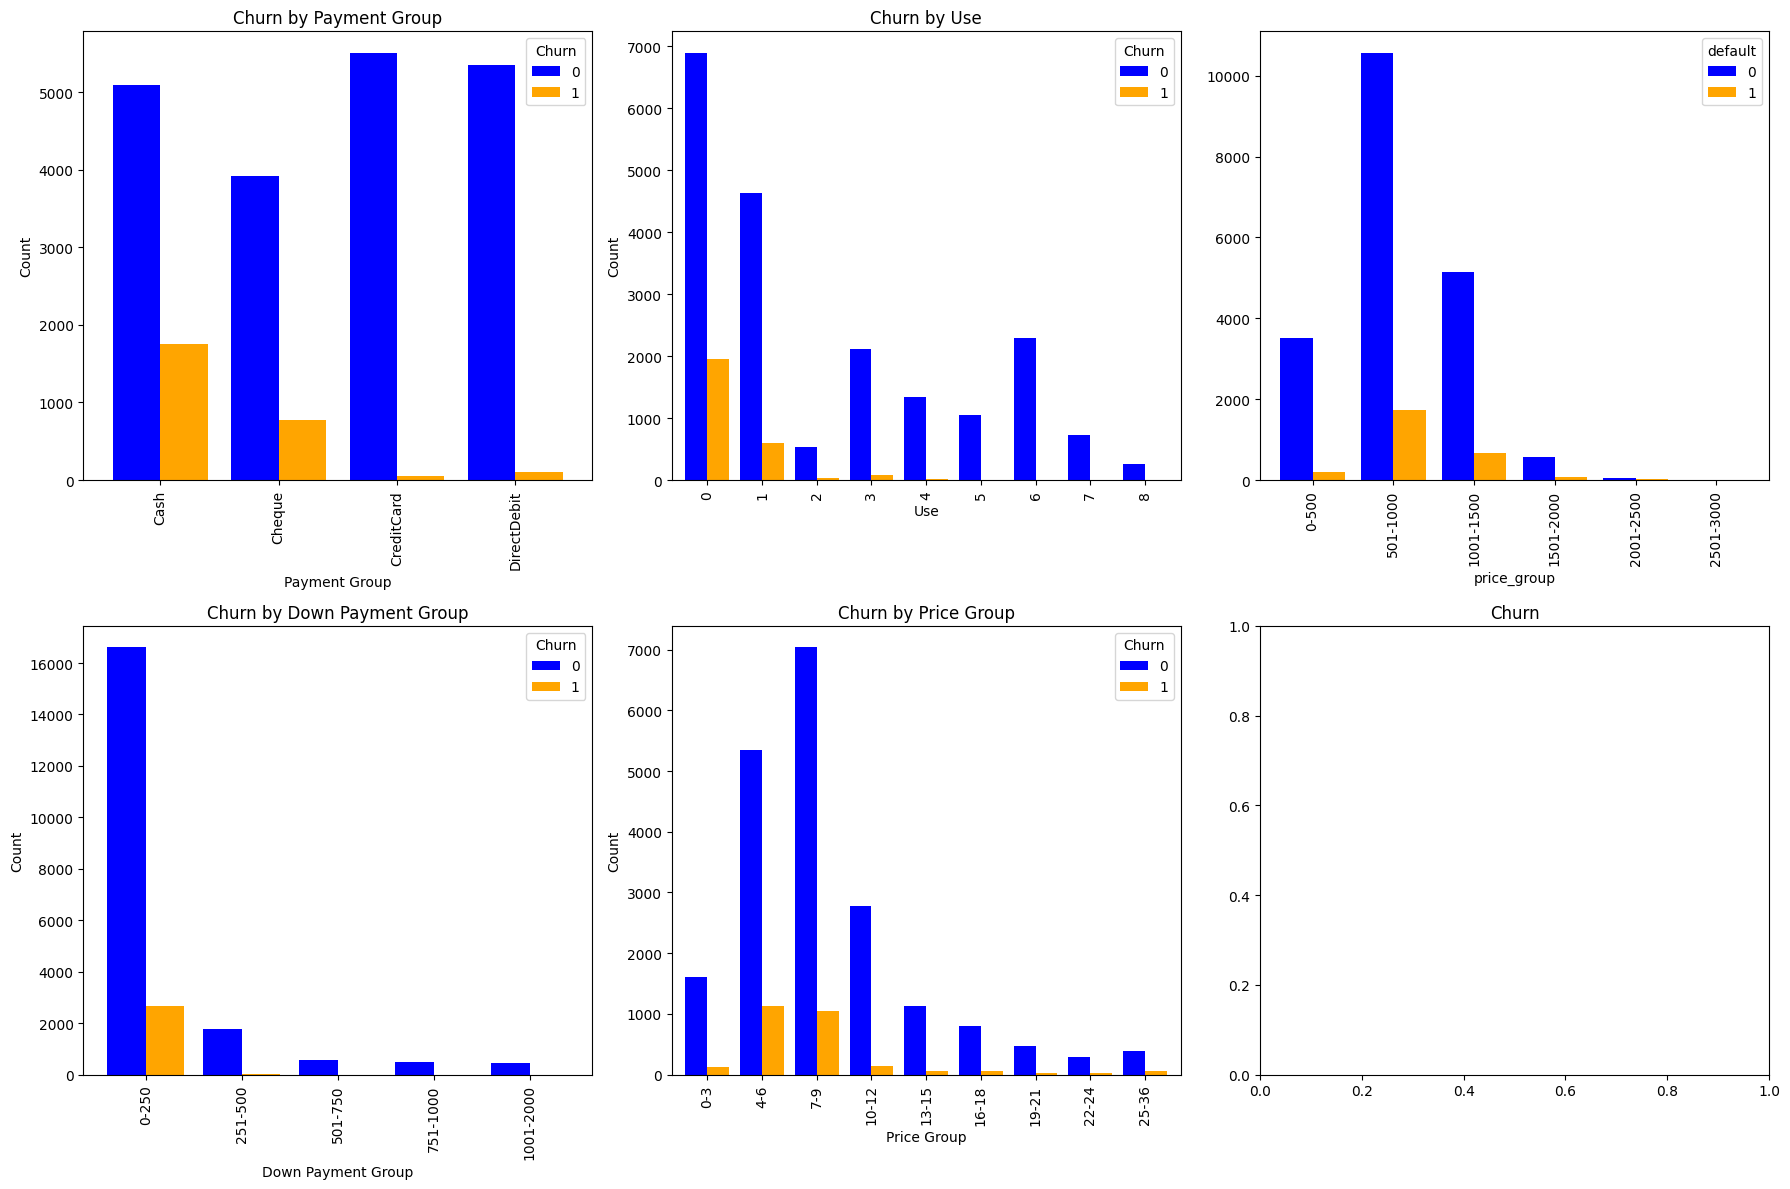

In [ ]:
price_bins = [0, 500, 1000, 1500, 2000, 2500, 3000]
price_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000']

downpmt_bins = [0, 250, 500, 750, 1000, 2000]
downpmt_labels = ['0-250', '251-500', '501-750', '751-1000', '1001-2000']

monthdue_bins = [0, 3, 6, 9, 12, 15, 18, 21, 24, 36]
monthdue_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-21', '22-24', '25-36']

age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

payment_default_counts = df.groupby(['pmttype', 'default']).size().unstack()

df['price_group'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=False)
df['downpmt_group'] = pd.cut(df['downpmt'], bins=downpmt_bins, labels=downpmt_labels, right=False)
df['monthdue_group'] = pd.cut(df['monthdue'], bins=monthdue_bins, labels=monthdue_labels, right=False)
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

gender_default_counts = df.groupby(['gender', 'default']).size().unstack()
use_default_counts = df.groupby(['use', 'default']).size().unstack()
price_default_counts = df.groupby(['price_group', 'default']).size().unstack()
downpmt_default_counts = df.groupby(['downpmt_group', 'default']).size().unstack()
monthdue_default_counts = df.groupby(['monthdue_group', 'default']).size().unstack()
age_default_counts = df.groupby(['age_group', 'default']).size().unstack()

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

plt.title('Churn')
payment_default_counts.plot(kind='bar', ax=axs[0, 0], width=0.8, color=['blue', 'orange'])
axs[0, 0].set_title('Churn by Payment Group')
axs[0, 0].set_xlabel('Payment Group')
axs[0, 0].set_ylabel('Count')
axs[0, 0].legend(title='Churn')

use_default_counts.plot(kind='bar', ax=axs[0, 1], width=0.8, color=['blue', 'orange'])
axs[0, 1].set_title('Churn by Use')
axs[0, 1].set_xlabel('Use')
axs[0, 1].set_ylabel('Count')
axs[0, 1].legend(title='Churn')

downpmt_default_counts.plot(kind='bar', ax=axs[1, 0], width=0.8, color=['blue', 'orange'])
axs[1, 0].set_title('Churn by Down Payment Group')
axs[1, 0].set_xlabel('Down Payment Group')
axs[1, 0].set_ylabel('Count')
axs[1, 0].legend(title='Churn')

monthdue_default_counts.plot(kind='bar', ax=axs[1, 1], width=0.8, color=['blue', 'orange'])
price_default_counts.plot(kind='bar', ax=axs[0, 2], width=0.8, color=['blue', 'orange'])
axs[1, 1].set_title('Churn by Price Group')
axs[1, 1].set_xlabel('Price Group')
axs[1, 1].set_ylabel('Count')
axs[1, 1].legend(title='Churn')


plt.tight_layout()

plt.show()

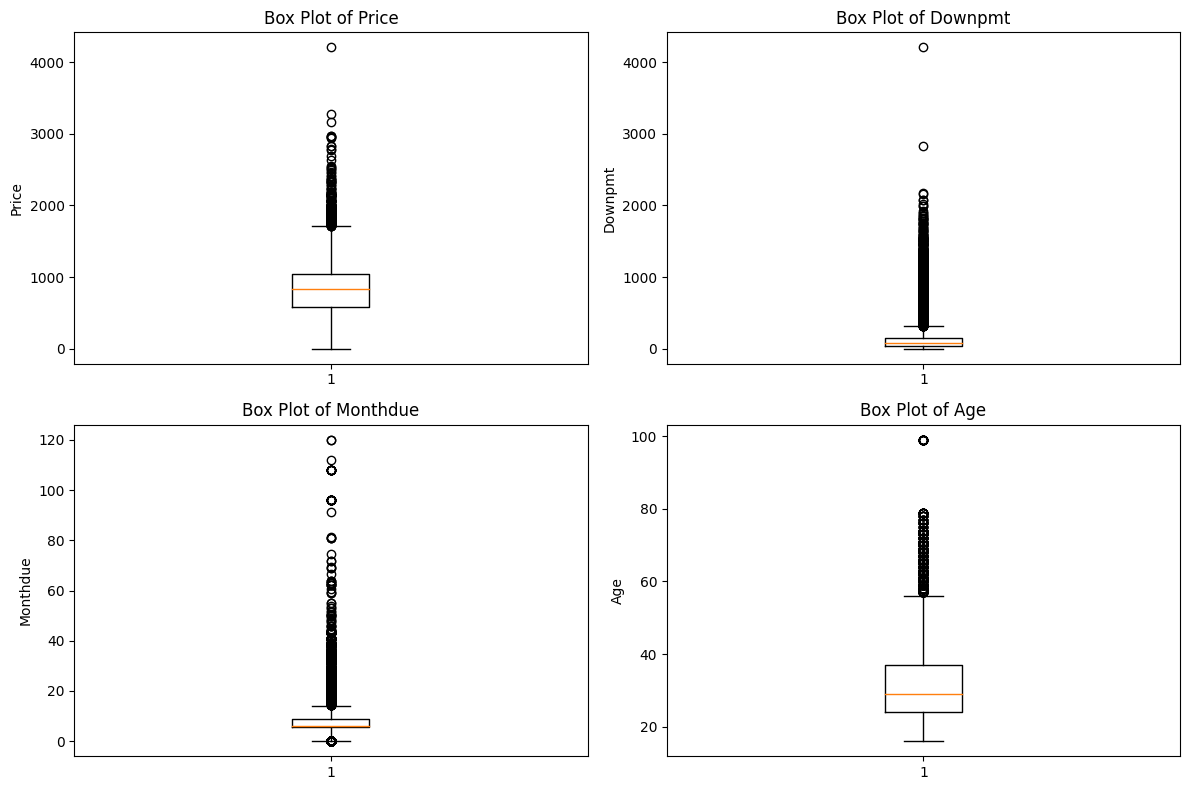

In [ ]:
columns_to_plot = ['price', 'downpmt', 'monthdue', 'age']

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[column].dropna())
    plt.title(f'Box Plot of {column.capitalize()}')
    plt.ylabel(column.capitalize())

plt.tight_layout()
plt.show()